In [148]:
import numpy as np
import pandas as pd
import torch

In [149]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [150]:
#Model
def model(t_u, w2, w1, b):
    return w2*t_u**2 + w1*t_u + b

In [151]:
#Average Loss
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [152]:
#Loss Calculation
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w2, w1, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [153]:
#Check loss
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [154]:
#Grad Descent
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w2 + delta, w1 + delta, b), t_c) - loss_fn(model(t_u, w2 - delta, w1 - delta, b), t_c)) / (2.0 * delta)
#loss_rate_of_change_w = (loss_fn(model(t_u,w1 + delta, b), t_c) - loss_fn(model(t_u, w1 - delta, b), t_c)) / (2.0 * delta)

In [155]:
learning_rate = 1e-2
w2 = w2 - learning_rate * loss_rate_of_change_w
w1 = w1 - learning_rate * loss_rate_of_change_w

In [156]:
loss_rate_of_change_b = (loss_fn(model(t_u, w2, w1, b + delta), t_c) - loss_fn(model(t_u, w2, w1, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

In [157]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [158]:
def dmodel_dw2(t_u, w2, b):
    return t_u

In [159]:
def dmodel_dw1(t_u, w1, b):
    return t_u

In [160]:
def dmodel_db(t_u, w2, w1, b):
    return 1.0

In [161]:
#Grad Descent
def grad_fn(t_u, t_c, t_p, w2, w1, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w2, b)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w2, w1, b)
    return torch.stack([dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])

In [162]:
#Normalize t_u
t_un = 0.1 * t_u
# params = torch.tensor([1.0, 1.0, 0])
# params

In [176]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w2, w1, b = params
        
        t_p = model(t_u, w2, w1, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w2, w1, b)
        
        params = params - learning_rate * grad
        if (epoch == 1) or (epoch % 500 == 0):
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [177]:
params = training_loop(n_epochs = 5000, learning_rate = 1e-3, params = torch.tensor([1.0, 1.0, 0]), t_u = t_un, t_c = t_c)

Epoch 1, Loss 675.794373
Epoch 500, Loss 8.035689
Epoch 1000, Loss 6.636409
Epoch 1500, Loss 5.582901
Epoch 2000, Loss 4.790622
Epoch 2500, Loss 4.195589
Epoch 3000, Loss 3.749397
Epoch 3500, Loss 3.415423
Epoch 4000, Loss 3.165985
Epoch 4500, Loss 2.980155
Epoch 5000, Loss 2.842138


In [146]:
params

tensor([ 0.4414,  0.4414, -4.5622])

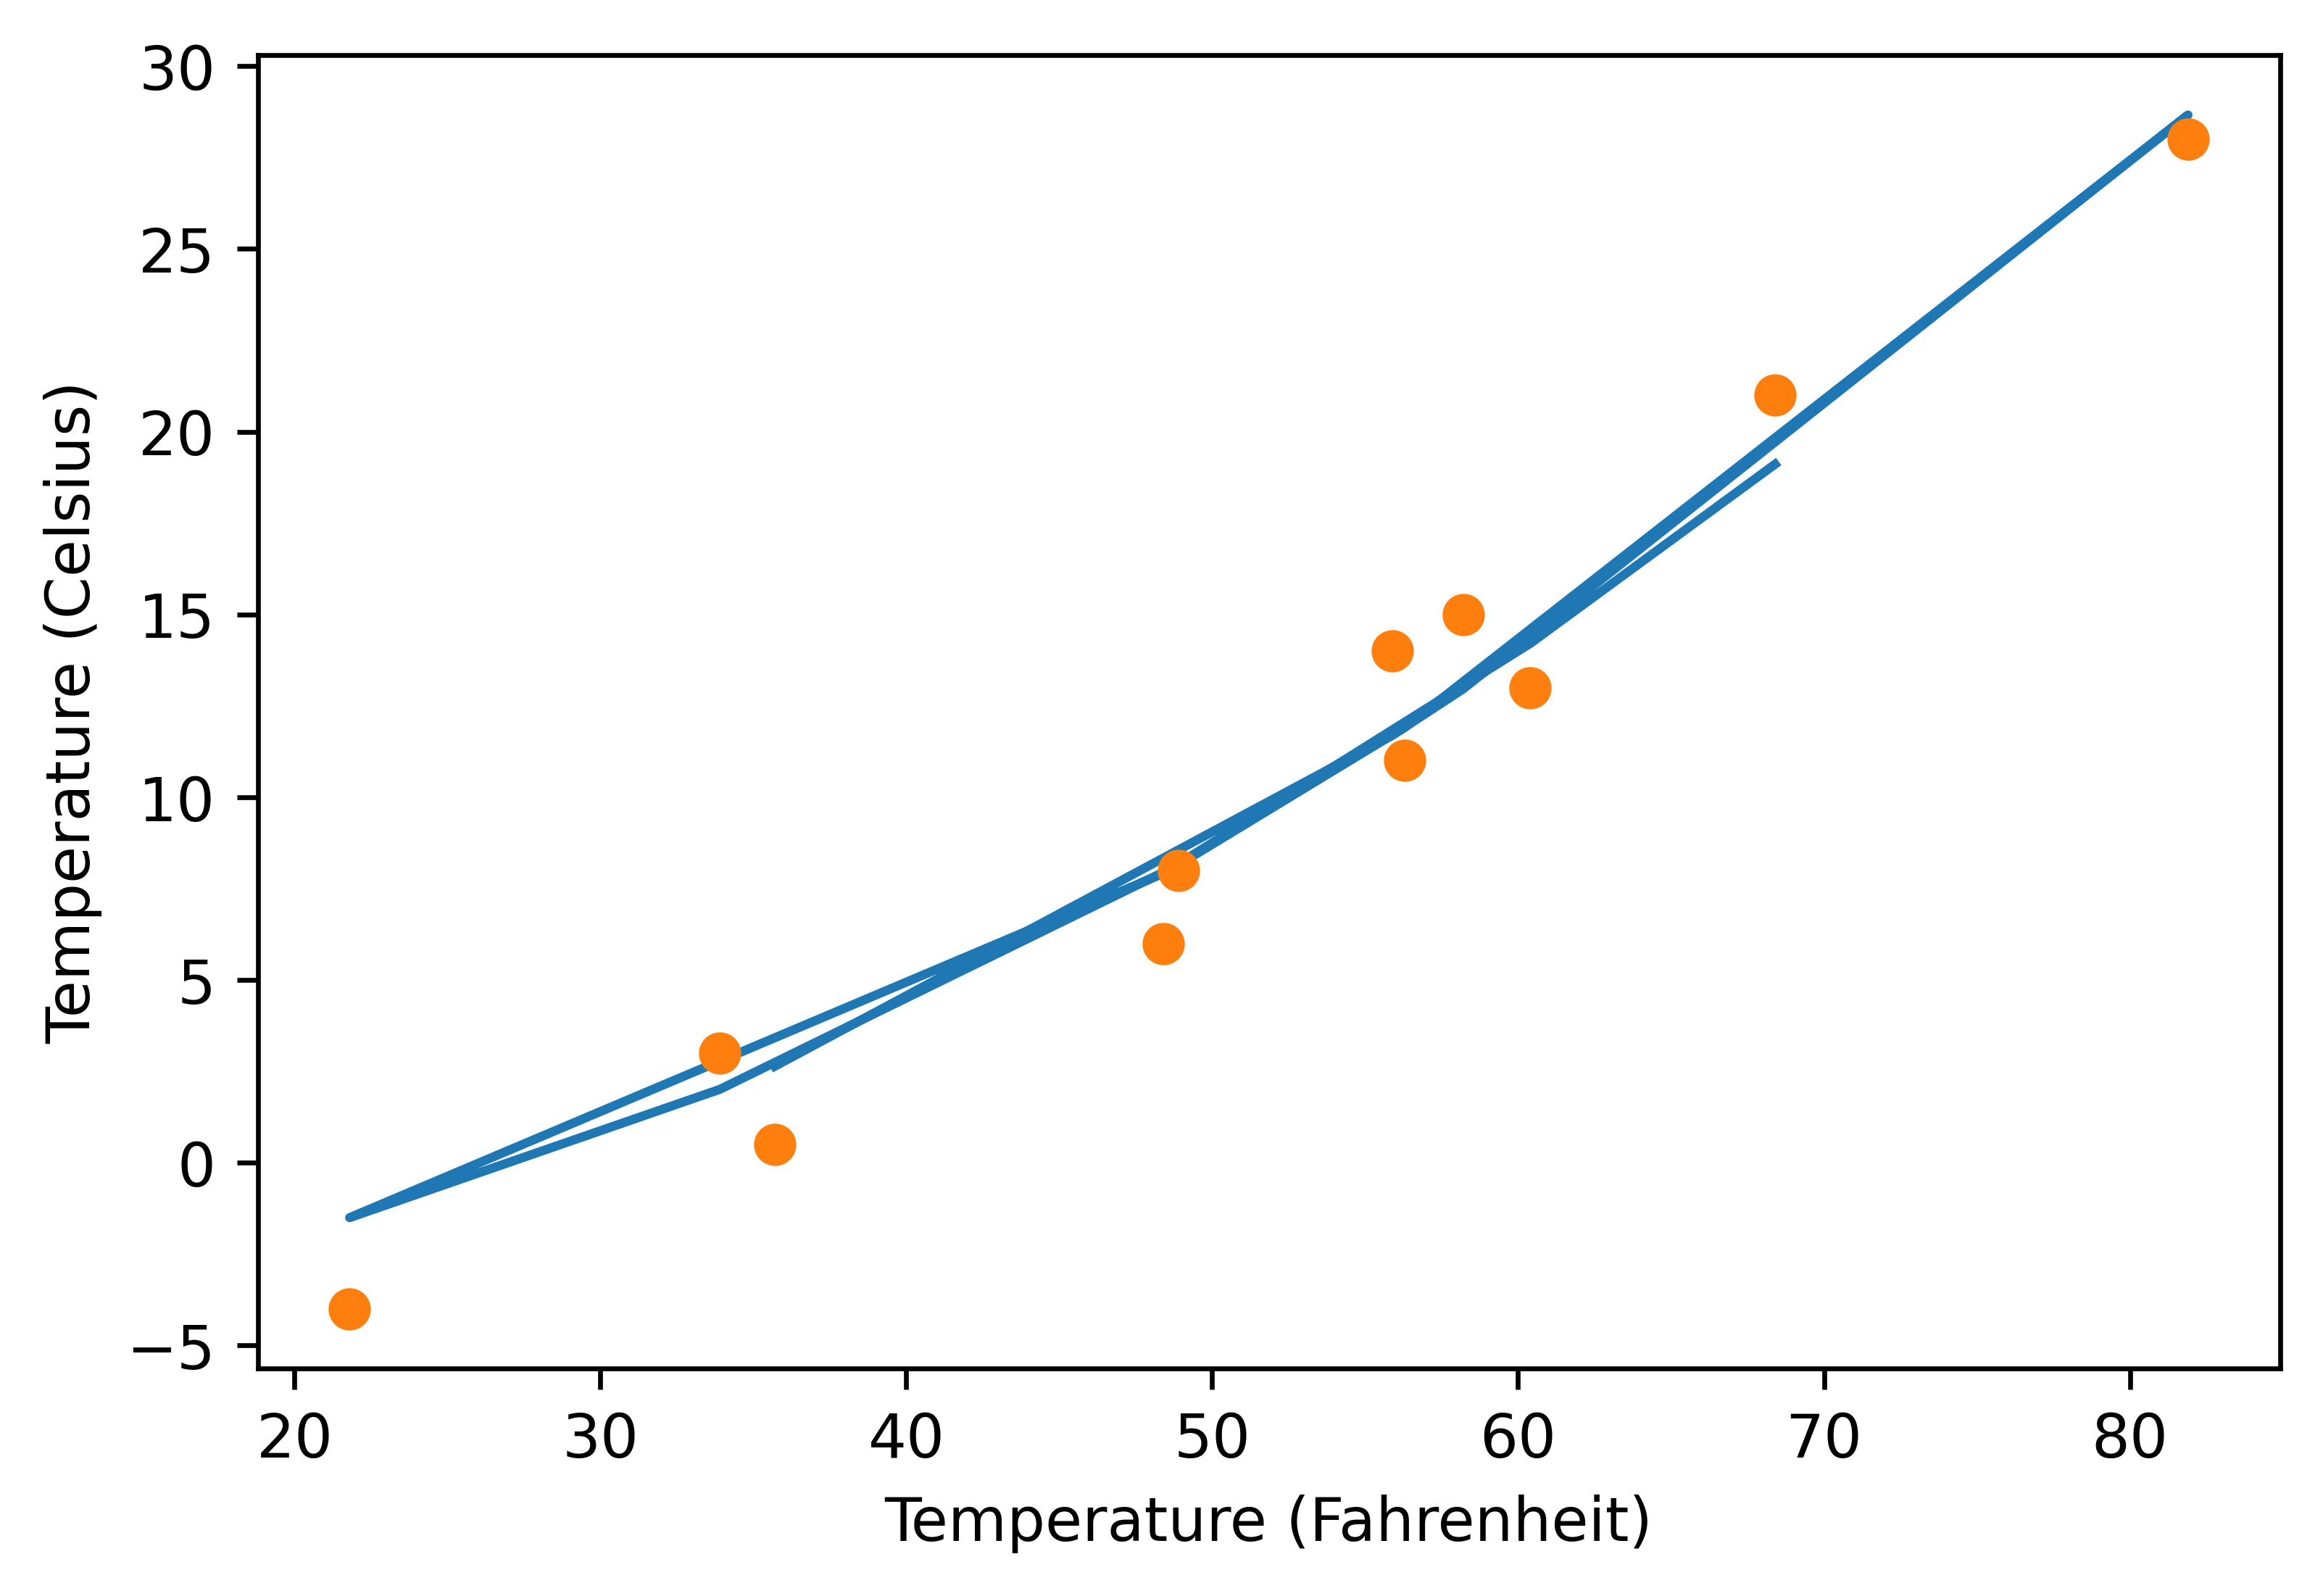

In [147]:
#Visualizing the outcome
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
